In [28]:
import os
import sys
import json

data_files = os.listdir('.')
data_files = [f for f in data_files if f[:1] == '_']

print(data_files)



['_greedyHeuristic_v1.txt', '_greedyLagHeuristic_v1.txt', '_ant_colony_200_v2.txt', '_ant_colony_200.txt', '_greedyHeuristic_v2.txt']


In [29]:
import numpy as np

results = {}
out = {}

dna_lengths = ['200', '400', '500', '600']

for fil in data_files:
    with open(fil, 'r') as f:
        res_values = {}
        tmp = f.readline()
        results[fil] = json.loads(tmp)
        for error_rate in results[fil]['files']:
            files = results[fil]['files'][error_rate]
            res_values[error_rate] = {}

            res_values[error_rate]['global_mean'] = np.mean(np.array([files[f]['quality'] for f in files]))

            #optimal solutions
            res_values[error_rate]['global_optimal'] = np.sum(np.array([1 for f in files if files[f]['quality'] == 1]))
            
            res_values[error_rate]['global_size'] = len([f for f in files])

            #for each length
            for l in dna_lengths:
                res_values[error_rate][l] = {}
                res_values[error_rate][l]['mean'] = np.mean(np.array([files[f]['quality'] for f in files if f[:3] == l]))
                res_values[error_rate][l]['optimal'] = np.sum(np.array([1 for f in files if files[f]['quality'] == 1 and f[:3] == l]))
                res_values[error_rate][l]['size'] = len([f for f in files if f[:3] == l])

        out[fil] = res_values

print(out)

{'_greedyHeuristic_v1.txt': {'5': {'global_mean': 0.5726619730608663, 'global_optimal': 0.0, 'global_size': 160, '200': {'mean': 0.5704511411577924, 'optimal': 0.0, 'size': 40}, '400': {'mean': 0.5766693020561282, 'optimal': 0.0, 'size': 40}, '500': {'mean': 0.5596900266496302, 'optimal': 0.0, 'size': 40}, '600': {'mean': 0.5838374223799141, 'optimal': 0.0, 'size': 40}}, '10': {'global_mean': 0.5838604429972565, 'global_optimal': 0.0, 'global_size': 160, '200': {'mean': 0.590987363649009, 'optimal': 0.0, 'size': 40}, '400': {'mean': 0.5896562348581275, 'optimal': 0.0, 'size': 40}, '500': {'mean': 0.5757671731004728, 'optimal': 0.0, 'size': 40}, '600': {'mean': 0.5790310003814169, 'optimal': 0.0, 'size': 40}}, '20': {'global_mean': 0.5760029399869597, 'global_optimal': 0.0, 'global_size': 160, '200': {'mean': 0.587682018514356, 'optimal': 0.0, 'size': 40}, '400': {'mean': 0.5840678579607055, 'optimal': 0.0, 'size': 40}, '500': {'mean': 0.558257757758118, 'optimal': 0.0, 'size': 40}, '60

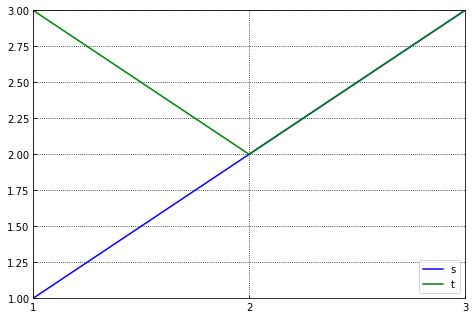

In [30]:
import matplotlib.pyplot as plt

colMarkers = ['bo', 'gv', 'rD', 'ks', 'md']

def plot_results(x_series, y_series, legendNames = None, xLabel='', yLabel='', xTicks=None, limits=None):
    __plot = plt.figure()
    a1 = __plot.add_axes([0, 0, 1, 1])

    j = 0
    for x_s, y_s in zip(x_series, y_series):
        a1.plot(x_s, y_s, str(colMarkers[j][0] + '-'))
        j += 1

        #legend
    a1.legend(labels = legendNames, loc = 'lower right')
    a1.set_xlabel(xLabel, fontsize = 14)
    
    a1.set_ylabel(yLabel, fontsize = 14)
    #grid
    a1.grid(color = 'k', ls = ':')
    #limits
    if limits is None:
        y_min = min([min(ser) for ser in y_series])
        y_max = max([max(ser) for ser in y_series])
        x_min = min([min(ser) for ser in x_series])
        x_max = max([max(ser) for ser in x_series])
    else:
        y_min = limits[2]
        y_max = limits[3]
        x_min = limits[0]
        x_max = limits[1]
    a1.set_ylim(y_min, y_max)
    a1.set_xlim(x_min, x_max)
    if xTicks is not None:
        a1.set_xticks(xTicks)
    #ticks
    
    a1.tick_params(direction = 'in')

    return __plot

tmp = plot_results([[1,2,3], [1,2,3]], [[1,2,3], [3,2,3]], xTicks=[1,2,3], legendNames=['s', 't'])
plt.show()

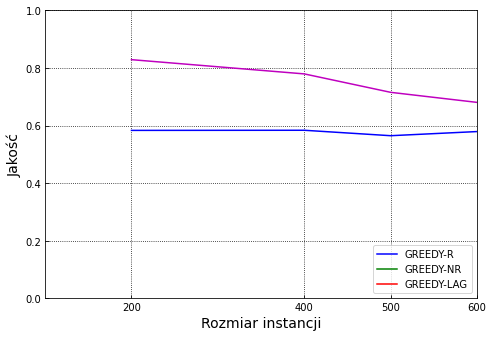

In [32]:
x_ser = []
y_ser = []

x_tic = [int(v) for v in dna_lengths]
lims = [100, 600, 0, 1]

legend_names = ['GREEDY-R', 'GREEDY-NR', 'GREEDY-LAG']

for res in out:
    tmp = [0] * len(dna_lengths)
    for err in out[res]:
        for i in range(len(dna_lengths)):
            tmp[i] += out[res][err][dna_lengths[i]]['mean']
    for i in range(len(tmp)):
        tmp[i] /= 3
    y_ser.append(tmp)

x_ser.append([int(v) for v in dna_lengths])
x_ser = x_ser * len(y_ser)

y_ser

tmp = plot_results(
    x_series=x_ser,
    y_series=y_ser,
    legendNames=legend_names,
    xLabel='Rozmiar instancji',
    yLabel='Jakość',
    xTicks=x_tic,
    limits=lims
)

plt.show()